# Importing essential libraries

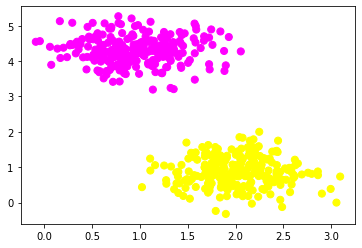

In [1]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
  
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show() 

What Support vector machines do, is to not only draw a line between two classes here, but consider a region about the line of some given width. 

In [2]:
import numpy as np
# creating line space between -1 to 3.5 
xfit = np.linspace(-1, 3.5)
print(xfit)

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


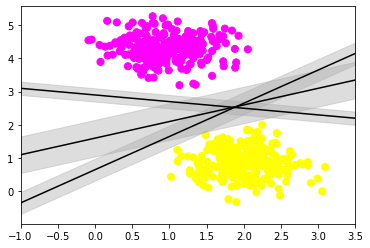

In [3]:
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
  
# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
    color='#AAAAAA', alpha=0.4)
  
plt.xlim(-1, 3.5);
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [5]:
from sklearn.svm import LinearSVC # "Support vector classifier"

svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

coef_[0]*x[0] + coef[1]*x[1] + intercept = 0 or coef_[0]*x + coef[1]*y + intercept = 0

y = -coef_[0]*x/coef_[1] - intercept/coef_[1]

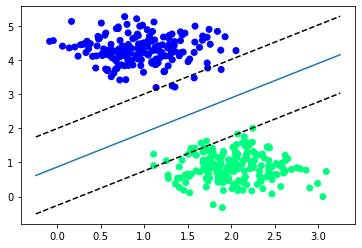

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[62,  0],
       [ 0, 63]])

# Exploring a new data set

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load the dataset

In [18]:
cancer = datasets.load_breast_cancer()

# Exploring Data

In [19]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


# Split the data into training/testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

# Generating Model

In [21]:
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets

In [22]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

# Predict the response for test dataset

In [23]:
y_pred = clf.predict(X_test)

# Evaluating the Model

In [24]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
